In [1]:
dates = '''
01-01-2017  06-01-2017  11-01-2017  16-01-2017  21-01-2017  26-01-2017
01-02-2017  06-02-2017  11-02-2017  16-02-2017  21-02-2017  26-02-2017
01-03-2017  06-03-2017  11-03-2017  16-03-2017  21-03-2017  26-03-2017
01-04-2017  06-04-2017  11-04-2017  16-04-2017  21-04-2017  26-04-2017
01-05-2017  06-05-2017  11-05-2017  16-05-2017  21-05-2017  26-05-2017
01-06-2017  06-06-2017  11-06-2017  16-06-2017  21-06-2017  26-06-2017
02-01-2017  07-01-2017  12-01-2017  17-01-2017  22-01-2017  27-01-2017
02-02-2017  07-02-2017  12-02-2017  17-02-2017  22-02-2017  27-02-2017
02-03-2017  07-03-2017  12-03-2017  17-03-2017  22-03-2017  27-03-2017
02-04-2017  07-04-2017  12-04-2017  17-04-2017  22-04-2017  27-04-2017
02-05-2017  07-05-2017  12-05-2017  17-05-2017  22-05-2017  27-05-2017
02-06-2017  07-06-2017  12-06-2017  17-06-2017  22-06-2017  27-06-2017
03-01-2017  08-01-2017  13-01-2017  18-01-2017  23-01-2017  28-01-2017
03-02-2017  08-02-2017  13-02-2017  18-02-2017  23-02-2017  28-02-2017
03-03-2017  08-03-2017  13-03-2017  18-03-2017  23-03-2017  28-03-2017
03-04-2017  08-04-2017  13-04-2017  18-04-2017  23-04-2017  28-04-2017
03-05-2017  08-05-2017  13-05-2017  18-05-2017  23-05-2017  28-05-2017
03-06-2017  08-06-2017  13-06-2017  18-06-2017  23-06-2017  28-06-2017
04-01-2017  09-01-2017  14-01-2017  19-01-2017  24-01-2017  29-01-2017
04-02-2017  09-02-2017  14-02-2017  19-02-2017  24-02-2017  29-03-2017
04-03-2017  09-03-2017  14-03-2017  19-03-2017  24-03-2017  29-04-2017
04-04-2017  09-04-2017  14-04-2017  19-04-2017  24-04-2017  29-05-2017
04-05-2017  09-05-2017  14-05-2017  19-05-2017  24-05-2017  29-06-2017
04-06-2017  09-06-2017  14-06-2017  19-06-2017  24-06-2017  30-01-2017
05-01-2017  10-01-2017  15-01-2017  20-01-2017  25-01-2017  30-03-2017
05-02-2017  10-02-2017  15-02-2017  20-02-2017  25-02-2017  30-04-2017
05-03-2017  10-03-2017  15-03-2017  20-03-2017  25-03-2017  30-05-2017
05-04-2017  10-04-2017  15-04-2017  20-04-2017  25-04-2017  31-01-2017
05-05-2017  10-05-2017  15-05-2017  20-05-2017  25-05-2017  31-03-2017
05-06-2017  10-06-2017  15-06-2017  20-06-2017  25-06-2017  31-05-2017
'''
datelist = dates.split()

In [2]:
import os
import sys
from collections import defaultdict
import json
import pickle
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
langlist = ["IN", "US"]
#datelist = ["01-01-2017"]
categoryfield = ["mCategory", "category"]
categorylist = ["politics"]
datadir = "../data/"

#Get list of English articles in politics category
articleids = defaultdict(set)
articlesources = set()
for lang in langlist:
    for date in datelist:
        filename = datadir+"LangGeoDataset/"+lang+"-"+date
        file = open(filename)
        file.readline()
        for i, line in enumerate(file):
            aid = line[0:7]
            line = line[8:]
            a = json.loads(line)
            try:
                category = a["category"]
            except:
                pass
            if(category in categorylist):
                articleids[category].add(aid)
                articlesources.add(a["source"])
                #print(line)
print(len(articleids["politics"]), articlesources)            

23288 {'sports.ndtv.com', 'www.breitbart.com', 'azcentral.com', 'sfgate.com', 'irishexaminer.com', 'vogue.in', 'jewishstandard.timesofisrael.com', 'www.bbc.com', 'amp.kansascity.com', 'miamiherald.com', 'thehindu.com', 'dailycaller.com', 'www.NPR.org', 'www.haidagwaiiobserver.com', 'www.LATimes.com', 'mashable.com', 'www.miamiherald.com', 'www.timeslive.co.za', 'tech.firstpost.com', 'www.sfgate.com', 'buffalonews.com', 'www.metro.us', 'rssfeeds.azcentral.com', 'timesfreepress.com', 'www.deseretnews.com', 'npr.org', 'raiderswire.usatoday.com', 'newyorker.com', 'bbc.co.uk', 'digitaledition.chicagotribune.com', 'www.kansascity.com', 'www.cnet.com', 'www.starobserver.com.au', 'www.telegraph.co.uk', 'www.foxbusiness.com', 'www.india.com', 'www.thehansindia.com', 'nymag.com', 'www.thehill.com', 'www.sify.com', 'english.manoramaonline.com', 'www.livemint.com', 'rssfeeds.usatoday.com', 'projects.seattletimes.com', 'mumbaimirror.com', 'huffingtonpost.in', 'www.politico.com', 'www.rt.com', 'nyti

In [4]:
#datelist = ["01-01-2017", "02-01-2017"]

#Read user's reading list
articlereaders = defaultdict(list)
for date in datelist:
    filename = datadir+"UserDataset/"+date
    file = open(filename)
    for i, line in enumerate(file):
        #if(i>100): break
        if(line[0:2] == "an"):
            userid = line.split('\t', 2)[1]
            readlist = eval(line.split('\t', 2)[2])
            for aid in readlist:
                for category in categorylist:
                    if(aid in articleids[category]):
                        articlereaders[aid].append(userid)
                        

In [14]:
#Remove all articles which have only one user
arlen = []
articlereadersnew = defaultdict(list)
for i, kv in enumerate(articlereaders.items()):
    if(len(kv[1])>1):
        arlen.append(len(kv[1]))
        articlereadersnew[kv[0]] = kv[1]

[34, 32, 31, 31, 31, 26, 24, 24, 23, 22, 22, 22, 19, 18, 18, 17, 17, 17, 17, 17] 2253


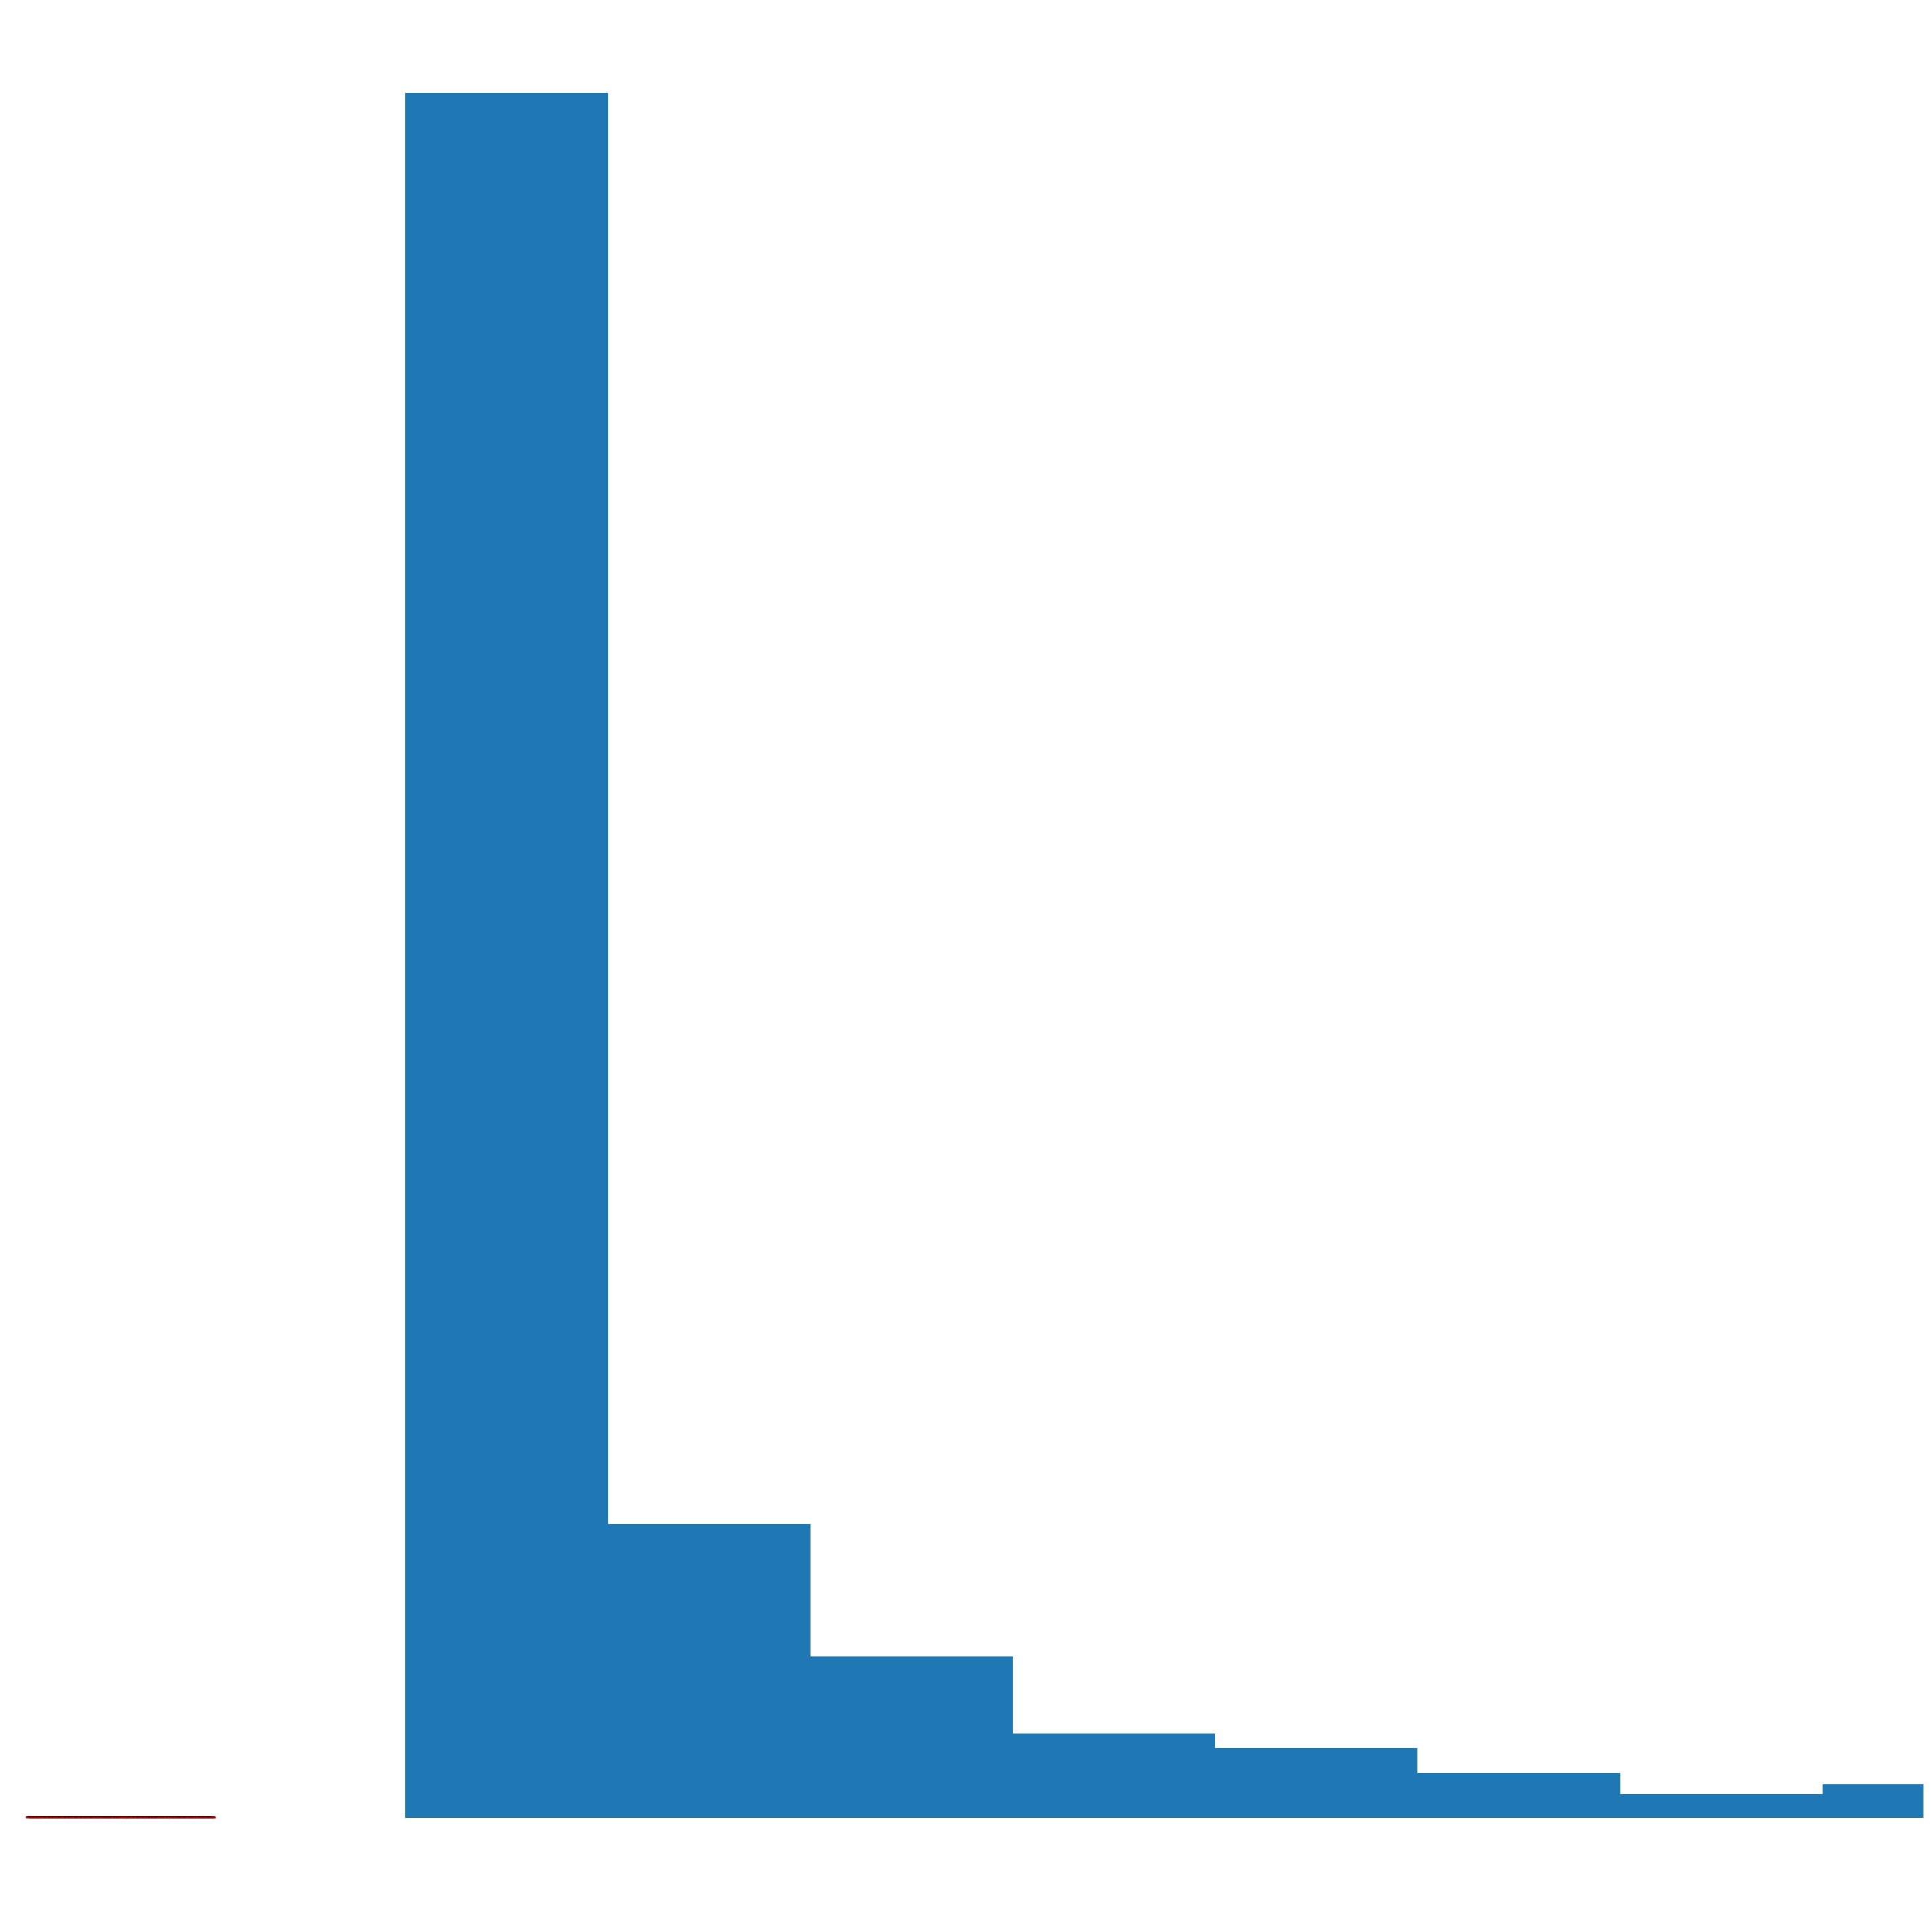

In [15]:
arlen.sort()
arlen.reverse()
print(arlen[0:20], len(arlen))
plt.hist(arlen, bins = 30)
plt.xlim(0, 10)
plt.show()

In [16]:
rg = nx.Graph()
for k,v in articlereadersnew.items():
    for i in range(0, len(v)):
        for j in range(i+1, len(v)):
            rg.add_edge(v[i], v[j])
print(len(list(rg.edges())))

18683


In [8]:
plt.figure(figsize = (40, 40))
edgelist = list(rg.edges())
graph_pos = nx.random_layout(rg)
nx.draw(rg, graph_pos,node_size = 2, linewidths = 0.1, alpha = 0.1)
plt.savefig("spring.png")

/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/user/.local/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/user/.local/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3

In [51]:
#Get community in readership graph
import community
part = community.best_partition(rg)
mod = community.modularity(part,rg)
commslistall = defaultdict(list)
for k, v in part.items():
    commslistall[v].append(k)
commslist = defaultdict(list)
for k,v in commslistall.items():
    if(len(v)>50):
        commslist[k] = v

In [52]:
comms = commslist.keys()
allnodes = sum(len(l) for l in commslist.values())
filterednodes = sum(len(l) for l in commslistall.values())
print(allnodes, filterednodes, len(comms))

3709 5026 30
